# Word Cloud on PetFinder datasets


The PetFinder dataset consists of cats/dogs information posted for adoption.

**Word Cloud** is a visual representation object for text processing that shows most frequent words with a bigger and bolder font with different colors. Smaller size words indicate that they are less important.

**Processing Steps**
- Import train and test datasets 
- Merge them into a new dataset
- Explore the Pet Type data
- Apply wordcloud to Pet names and explore it
- Check out the breed and breed subtype data
- Use wordcloud on the description column

## Data Fields
- PetID - Unique hash ID of pet profile
- AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
- Type - Type of animal (1 = Dog, 2 = Cat)
- Name - Name of pet (Empty if not named)
- Age - Age of pet when listed, in months
- Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
- Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
- Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
- Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
- Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
- Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
- MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
- FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
- Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
- Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
- Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
- Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
- Quantity - Number of pets represented in profile
- Fee - Adoption fee (0 = Free)
- State - State location in Malaysia (Refer to StateLabels dictionary)
- RescuerID - Unique hash ID of rescuer
- VideoAmt - Total uploaded videos for this pet
- PhotoAmt - Total uploaded photos for this pet
- Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.


## AdoptionSpeed

### Values indicate following:
0 - Pet was adopted on the same day as it was listed.<br>
1 - Pet was adopted between 1 and 7 days (1st week) after being listed.<br>
2 - Pet was adopted between 8 and 30 days (1st month) after being listed.<br>
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.<br>
4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).<br> 

In [1]:
# importing packages
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

from wordcloud import WordCloud
from PIL import Image

%matplotlib inline
# plt.style.use('ggplot')
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

## Data Processing

In [2]:
# reading the training dataset
train = pd.read_csv('./data/pet-train.csv', encoding = 'utf-8')

In [3]:
# checking shape
train.shape

(14993, 24)

In [4]:
# reading the test dataset
test = pd.read_csv('./data/pet-test.csv', encoding = 'utf-8')

In [5]:
# checking shape
test.shape

(3948, 23)

In [6]:
# adding a column called dataset and set all its value to train
train['dataset'] = 'train'

In [7]:
# adding a column called dataset and set all values to test
test['dataset'] = 'test'

In [8]:
# creating a new df by merging the test dataset into train
merged = train.append(test, ignore_index = True)

In [9]:
# checking shape of the merged df
merged.shape

(18941, 25)

In [10]:
# checking frist rows
merged.head(2)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,dataset
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2.0,train
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0.0,train


In [11]:
# checking last few rows
merged.tail(2)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,dataset
18939,1,Lynelle Nozomi H.,2,119,213,2,1,2,7,2,1,2,2,2,1,1,0,41401,2ef4c4bde6e0d6f61ce8f6d2c5f37ec8,0,I adopted Lynelle on 13 December . I am happy ...,2d7a91c59,3.0,NaN,test
18940,1,Blackie,3,307,0,1,1,0,0,2,1,3,3,3,1,1,0,41330,e93d16367aa91743ef802fc6590f0b31,0,"Lil Blackie always friendly, loving and playfu...",e5bbe3e54,1.0,NaN,test


In [12]:
# checking info of the df
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18941 entries, 0 to 18940
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           18941 non-null  int64  
 1   Name           17381 non-null  object 
 2   Age            18941 non-null  int64  
 3   Breed1         18941 non-null  int64  
 4   Breed2         18941 non-null  int64  
 5   Gender         18941 non-null  int64  
 6   Color1         18941 non-null  int64  
 7   Color2         18941 non-null  int64  
 8   Color3         18941 non-null  int64  
 9   MaturitySize   18941 non-null  int64  
 10  FurLength      18941 non-null  int64  
 11  Vaccinated     18941 non-null  int64  
 12  Dewormed       18941 non-null  int64  
 13  Sterilized     18941 non-null  int64  
 14  Health         18941 non-null  int64  
 15  Quantity       18941 non-null  int64  
 16  Fee            18941 non-null  int64  
 17  State          18941 non-null  int64  
 18  Rescue

In [13]:
# transposing df
merged.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Type,18941.0,1.471886,0.499222,1.0,1.0,1.0,2.0,2.0
Age,18941.0,10.683966,18.247672,0.0,2.0,3.0,12.0,255.0
Breed1,18941.0,264.805871,59.880084,0.0,265.0,266.0,307.0,307.0
Breed2,18941.0,70.539201,121.002279,0.0,0.0,0.0,128.0,307.0
Gender,18941.0,1.777520,0.683895,1.0,1.0,2.0,2.0,3.0
Color1,18941.0,2.233726,1.743388,1.0,1.0,2.0,3.0,7.0
Color2,18941.0,3.250515,2.734236,0.0,0.0,2.0,6.0,7.0
Color3,18941.0,1.919381,2.996918,0.0,0.0,0.0,5.0,7.0
MaturitySize,18941.0,1.854179,0.552772,1.0,2.0,2.0,2.0,4.0
FurLength,18941.0,1.467346,0.602049,1.0,1.0,1.0,2.0,3.0


In [14]:
# describing df
merged.describe(include = 'object').transpose()

,count,unique,top,freq
Name,17381,11105,Baby,83
RescuerID,18941,7113,fa90fa5b1ee11c86938398b60abc32cb,459
Description,18927,17779,For Adoption,164
PetID,18941,18941,18ef93321,1
dataset,18941,2,train,14993


## Utility Functions

In [15]:
# creating functions to plot data
main_count = train['AdoptionSpeed'].value_counts(normalize=True).sort_index()
def prepare_plot_dict(df, col, main_count):
    """
    Preparing dictionary with data for plotting to show how much higher/lower are the rates 
    of 'Adoption Speed' for the current column comparing to base values (as described higher). 
    At first, calculate base rates, then for each category in the column, calculate rates of 
    'Adoption Speed' and find difference with the base rates.

    """
    main_count = dict(main_count)
    plot_dict = {}
    for i in df[col].unique():
        val_count = dict(df.loc[df[col] == i, 'AdoptionSpeed'].value_counts().sort_index())

        for k, v in main_count.items():
            if k in val_count:
                plot_dict[val_count[k]] = ((val_count[k] / sum(val_count.values())) / main_count[k]) * 100 - 100
            else:
                plot_dict[0] = 0

    return plot_dict

def make_count_plot(df, x, hue='AdoptionSpeed', title='', main_count=main_count):
    """
    Plotting countplot with correct annotations.
    """
    g = sns.countplot(x=x, data=df, hue=hue);
    plt.title(f'AdoptionSpeed {title}');
    ax = g.axes

    plot_dict = prepare_plot_dict(df, x, main_count)

    for p in ax.patches:
        h = p.get_height() if str(p.get_height()) != 'nan' else 0
        text = f"{plot_dict[h]:.0f}%" if plot_dict[h] < 0 else f"+{plot_dict[h]:.0f}%"
        ax.annotate(text, (p.get_x() + p.get_width() / 2., h),
             ha='center', va='center', fontsize=11, color='green' if plot_dict[h] > 0 else 'red', 
                    rotation=0, xytext=(0, 10),
             textcoords='offset points')  


def plot_four_graphs(col='', main_title='', dataset_title=''):
    """
    Plotting four graphs:
    - adoption speed by variable;
    - counts of categories in the variable in train and test;
    - adoption speed by variable for dogs;
    - adoption speed by variable for cats;    
    """
    plt.figure(figsize=(20, 12));
    plt.subplot(2, 2, 1)
    make_count_plot(df=train, x=col, title=f'and {main_title}')

    plt.subplot(2, 2, 2)
    sns.countplot(x='dataset', data=merged, hue=col);
    plt.title(dataset_title);

    plt.subplot(2, 2, 3)
    make_count_plot(df=train.loc[train['Type'] == 1], x=col, title=f'and {main_title} for dogs')

    plt.subplot(2, 2, 4)
    make_count_plot(df=train.loc[train['Type'] == 2], x=col, title=f'and {main_title} for cats')

## Adoption Speed Exploration

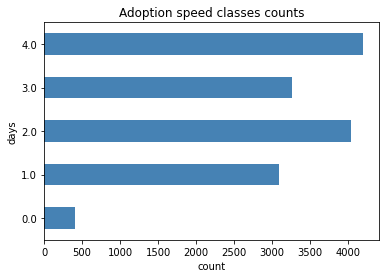

In [16]:
# plotting the 'Adoption Speed' for the overall dataset
merged['AdoptionSpeed'].value_counts().sort_index().plot(kind = 'barh', color='steelblue')
plt.xlabel('count')
plt.ylabel('days')
plt.title('Adoption speed classes counts')
plt.show()

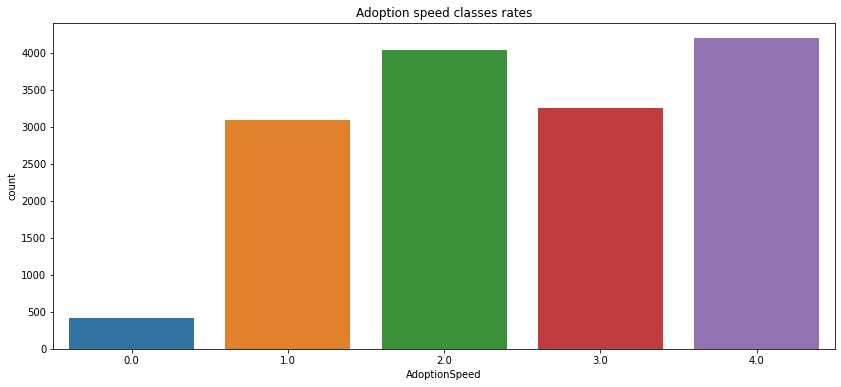

In [17]:
# plotting the 'Adoption Speed' from the training dataset
plt.figure(figsize=(14, 6));
g = sns.countplot(x='AdoptionSpeed', data=merged.loc[merged['dataset'] == 'train']);
plt.title('Adoption speed classes rates');
ax=g.axes

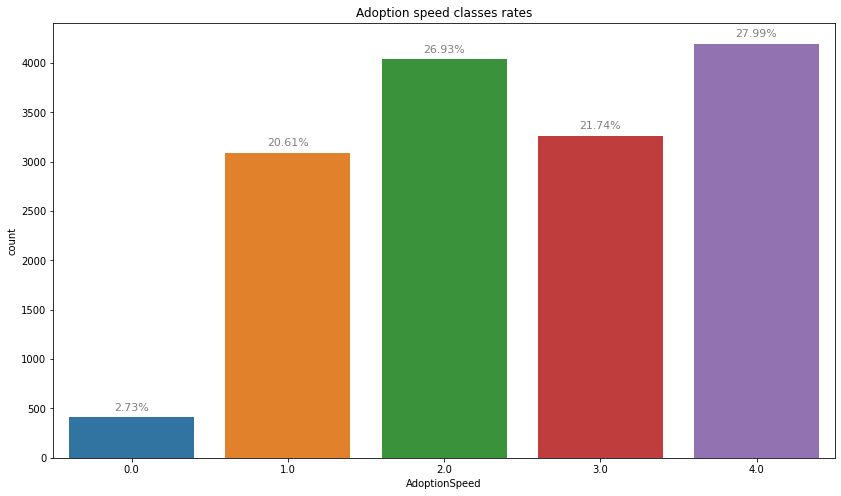

In [18]:
# plotting the same informaion as above - add percentages for each class
plt.figure(figsize=(14, 8));
g = sns.countplot(x='AdoptionSpeed', data=merged.loc[merged['dataset'] == 'train'])
plt.title('Adoption speed classes rates');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / train.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points')  

We can see that some pets were adopted immediately, but these are rare cases: maybe someone wanted to adopt any pet, or the pet was lucky to be seen by person, who wanted a similar pet.

It is nice that a lot of pets are adopted within a first week of being listed!

One more interesting thing is that the classes have a linear relationship - the higher the number, the worse situation is. So it could be possible to build not only multiclass classification, but also regression.

## Pet Type
1 is Dog, 2 is Cat

In [19]:
# getting values count
merged['Type'].value_counts()

1    10003
2     8938
Name: Type, dtype: int64

In [20]:
# converting the pet type
merged['Type'] = merged['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')
merged['Type'].value_counts()

Dog    10003
Cat     8938
Name: Type, dtype: int64

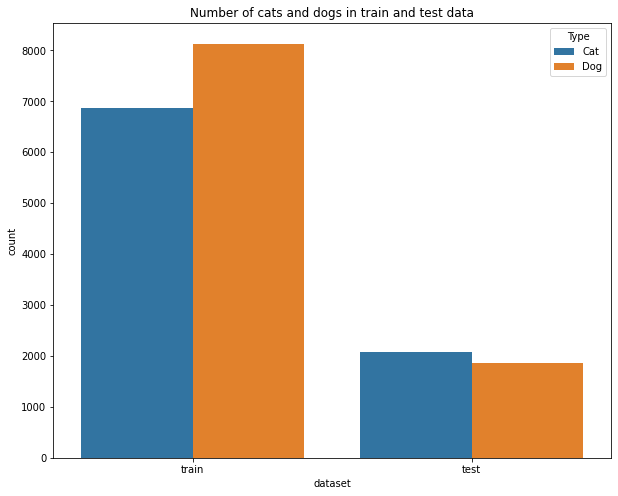

In [21]:
# plotting 'Type' col for both dfs
plt.figure(figsize=(10, 8));
sns.countplot(x='dataset', data = merged, hue = 'Type');
plt.title('Number of cats and dogs in train and test data');

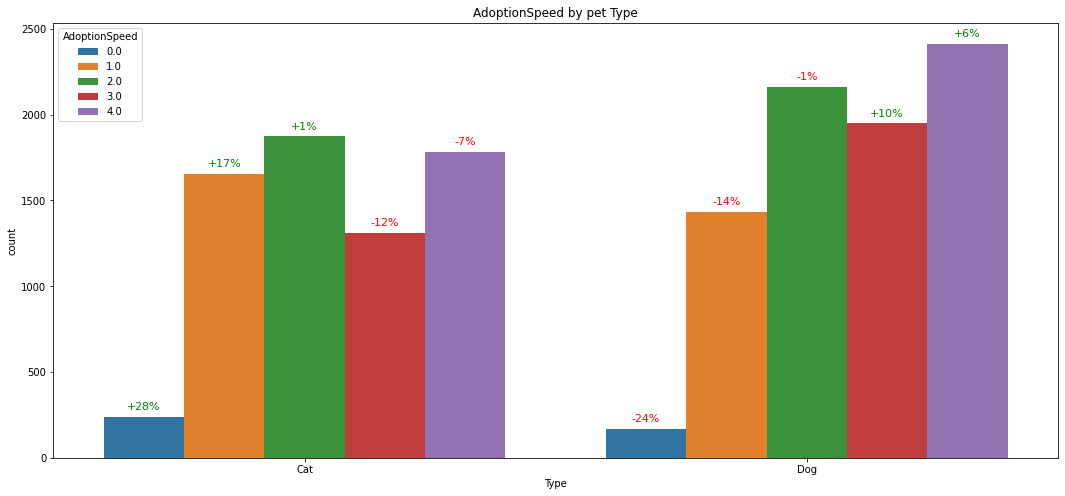

In [22]:
# plotting 'Adoptoon Speed' / pet type 
plt.figure(figsize=(18, 8));
make_count_plot(df=merged.loc[merged['dataset'] == 'train'], x='Type', title='by pet Type')

We can see that cats are more likely to be adopted early than dogs and overall the percentage of not adopted cats is lower. Does this mean people prefer cats? Or maybe this dataset is small and could contain bias. On the other hand more dogs are adopted after several months.

## Pet Name 

**Are names important in adoption?**

At first let's look at most common names using wordcloud


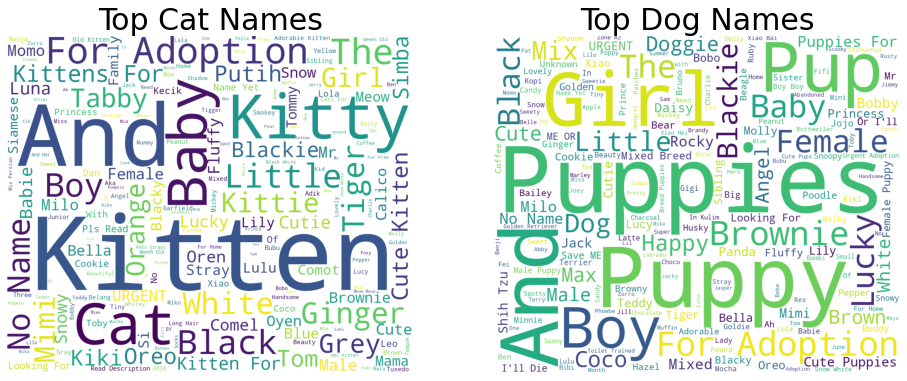

In [23]:
# plotting top names
fig, ax = plt.subplots(figsize = (16, 12))
# nrows, ncols, index - index 1 means upper left corner and increases to right
plt.subplot(1, 2, 1)
text_cat = ' '.join(merged.loc[merged['Type'] == 'Cat', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top Cat Names', fontsize = 30)
plt.axis("off")

#index 2 means second column
plt.subplot(1, 2, 2)
text_dog = ' '.join(merged.loc[merged['Type'] == 'Dog', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top Dog Names', fontsize = 30)
plt.axis("off")

plt.show()

It is worth noticing some things:

    - Often we see normal pet names like "Mimi", "Angel" and so on;
    - Quite often people write simply who is there for adoption: "Kitten", "Puppies";
    - Vety often the color of pet is written, sometimes gender;
    - And it seems that sometimes names can be strange or there is some info written instead of the name;

One more thing to notice is that some pets don't have names. Let's see whether this is important

## Most Popular Pet Names and Adoption Speed

In [24]:
# printing the most popular names and Adoption Speed
print('Most Popular Pet Names and AdoptionSpeed')
for n in train['Name'].value_counts().index[:5]:
    print("pet name: {}".format(n))
    print(train.loc[train['Name'] == n, 'AdoptionSpeed'].value_counts().sort_index())
    print('')

Most Popular Pet Names and AdoptionSpeed
pet name: Baby
0     2
1    11
2    15
3    11
4    27
Name: AdoptionSpeed, dtype: int64

pet name: Lucky
0     5
1    14
2    16
3    12
4    17
Name: AdoptionSpeed, dtype: int64

pet name: No Name
0     3
1    14
2    11
3     6
4    20
Name: AdoptionSpeed, dtype: int64

pet name: Brownie
0     1
1    11
2    14
3    12
4    16
Name: AdoptionSpeed, dtype: int64

pet name: Mimi
0     3
1    12
2    13
3     7
4    17
Name: AdoptionSpeed, dtype: int64



In [25]:
# replacing null names
train['Name'] = train['Name'].fillna('Unnamed')
test['Name'] = test['Name'].fillna('Unnamed')
merged['Name'] = merged['Name'].fillna('Unnamed')

train['No_name'] = 0
train.loc[train['Name'] == 'Unnamed', 'No_name'] = 1
test['No_name'] = 0
test.loc[test['Name'] == 'Unnamed', 'No_name'] = 1
merged['No_name'] = 0
merged.loc[merged['Name'] == 'Unnamed', 'No_name'] = 1

print(f"Percentage of unnamed Pets in train data: {train['No_name'].sum() * 100 / train['No_name'].shape[0]:.2f}%.")
print(f"Percentage of unnamed Tets in test data:  {test['No_name'].sum() * 100 / test['No_name'].shape[0]:.2f}%.")

Percentage of unnamed Pets in train data: 8.42%.
Percentage of unnamed Tets in test data:  7.67%.


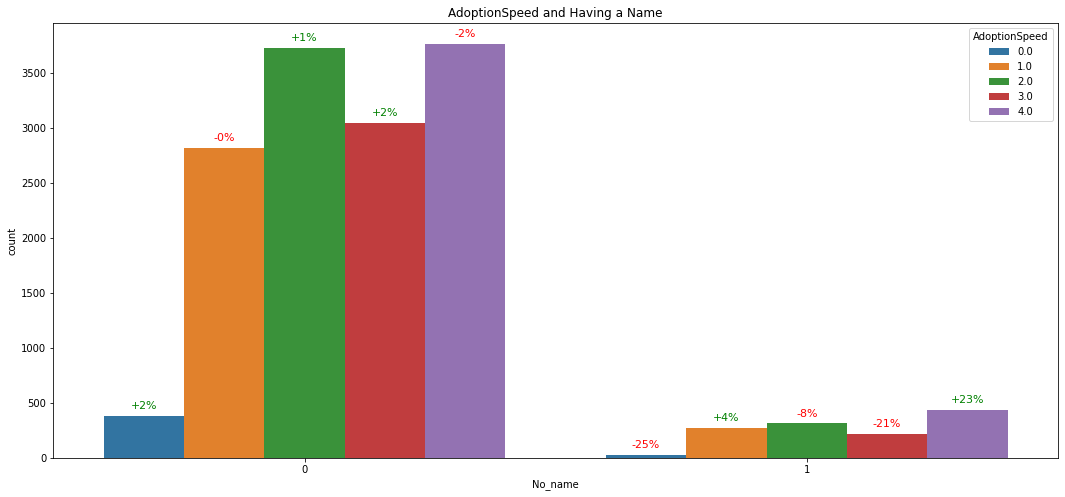

In [26]:
# plotting Adoption Speed x Having Name
plt.figure(figsize=(18, 8))
make_count_plot(df=merged.loc[merged['dataset'] == 'train'], x='No_name', title='and Having a Name')

## Breeds

- There is a main breed of the pet and secondary if relevant
- At first let's see whether having secondary breed influences adoption speed.

In [27]:
# chceking pure breed pets percentage per df
train['Pure_breed'] = 0
train.loc[train['Breed2'] == 0, 'Pure_breed'] = 1
test['Pure_breed'] = 0
test.loc[test['Breed2'] == 0, 'Pure_breed'] = 1
merged['Pure_breed'] = 0
merged.loc[merged['Breed2'] == 0, 'Pure_breed'] = 1

print(f"Rate of pure breed pets in train data: {train['Pure_breed'].sum() * 100 / train['Pure_breed'].shape[0]:.2f}%.")
print(f"Rate of pure breed pets in test data: {test['Pure_breed'].sum() * 100 / test['Pure_breed'].shape[0]:.2f}%.")

Rate of pure breed pets in train data: 71.78%.
Rate of pure breed pets in test data: 77.96%.


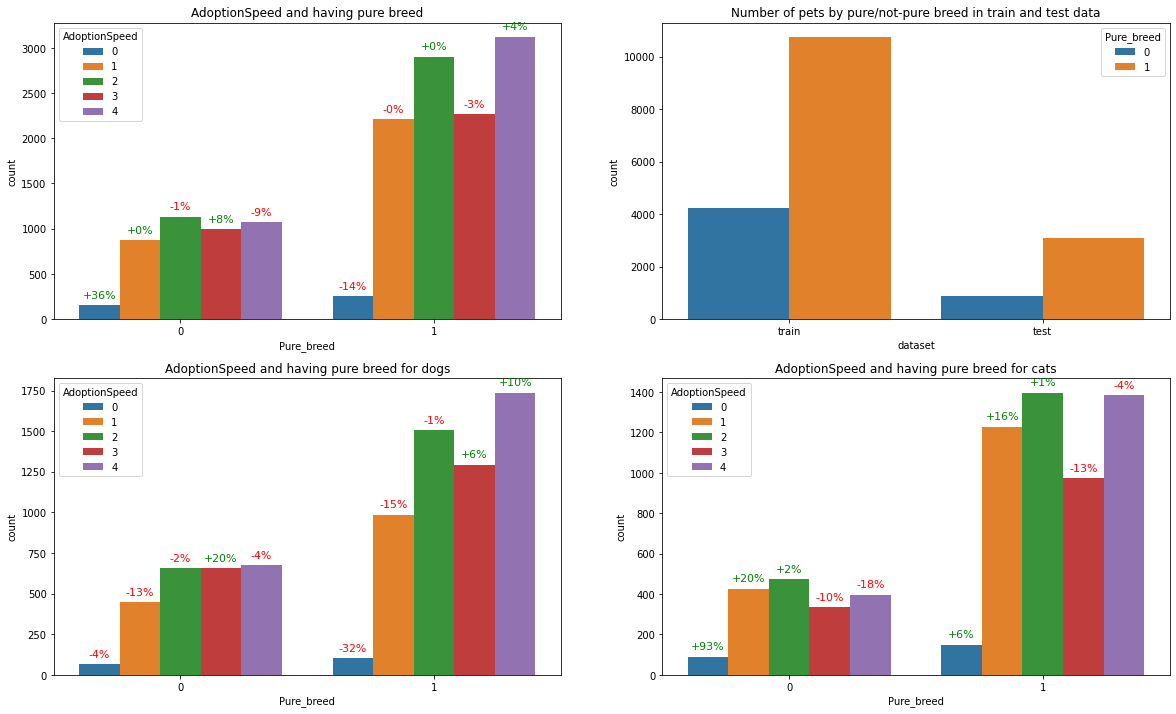

In [28]:
# plotting number of pets by pure/not-pure breed in train and test data
plot_four_graphs(col='Pure_breed', 
                 main_title='having pure breed', 
                 dataset_title='Number of pets by pure/not-pure breed in train and test data')

It seems that non-pure breed pets tend to be adopted more and faster, especially cats.

In [29]:
# loading the bread type and names
breeds = pd.read_csv('./data/breed_labels.csv', encoding = 'utf-8')

In [30]:
# checking frist few rows
breeds.head(2)

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound


In [31]:
# creating a dictionary of BreedID and BreedName
breeds_dict = {k: v for k, v in zip(breeds['BreedID'], breeds['BreedName'])}

In [32]:
# printing dict
print(breeds_dict)

{1: 'Affenpinscher', 2: 'Afghan Hound', 3: 'Airedale Terrier', 4: 'Akbash', 5: 'Akita', 6: 'Alaskan Malamute', 7: 'American Bulldog', 8: 'American Eskimo Dog', 9: 'American Hairless Terrier', 10: 'American Staffordshire Terrier', 11: 'American Water Spaniel', 12: 'Anatolian Shepherd', 13: 'Appenzell Mountain Dog', 14: 'Australian Cattle Dog/Blue Heeler', 15: 'Australian Kelpie', 16: 'Australian Shepherd', 17: 'Australian Terrier', 18: 'Basenji', 19: 'Basset Hound', 20: 'Beagle', 21: 'Bearded Collie', 22: 'Beauceron', 23: 'Bedlington Terrier', 24: 'Belgian Shepherd Dog Sheepdog', 25: 'Belgian Shepherd Laekenois', 26: 'Belgian Shepherd Malinois', 27: 'Belgian Shepherd Tervuren', 28: 'Bernese Mountain Dog', 29: 'Bichon Frise', 30: 'Black and Tan Coonhound', 31: 'Black Labrador Retriever', 32: 'Black Mouth Cur', 33: 'Black Russian Terrier', 34: 'Bloodhound', 35: 'Blue Lacy', 36: 'Bluetick Coonhound', 37: 'Boerboel', 38: 'Bolognese', 39: 'Border Collie', 40: 'Border Terrier', 41: 'Borzoi', 

In [33]:
# creating 'Breed' name and the subtype (if no subtype then put '-')
train['Breed1_name'] = train['Breed1'].apply(lambda x: '_'.join(breeds_dict[x].split()) 
                                             if x in breeds_dict else 'Unknown')
train['Breed2_name'] = train['Breed2'].apply(lambda x: '_'.join(breeds_dict[x]) 
                                             if x in breeds_dict else '-')
test['Breed1_name'] = test['Breed1'].apply(lambda x: '_'.join(breeds_dict[x].split()) 
                                           if x in breeds_dict else 'Unknown')
test['Breed2_name'] = test['Breed2'].apply(lambda x: '_'.join(breeds_dict[x].split()) 
                                           if x in breeds_dict else '-')
merged['Breed1_name'] = merged['Breed1'].apply(lambda x: '_'.join(breeds_dict[x].split()) 
                                               if x in breeds_dict else 'Unknown')
merged['Breed2_name'] = merged['Breed2'].apply(lambda x: '_'.join(breeds_dict[x].split()) 
                                               if x in breeds_dict else '-')

In [34]:
# defining cols
cols = ['Breed1', 'Breed2', 'Breed1_name', 'Breed2_name', 'Pure_breed']
merged[cols]

,Breed1,Breed2,Breed1_name,Breed2_name,Pure_breed
0,299,0,Tabby,-,1
1,265,0,Domestic_Medium_Hair,-,1
2,307,0,Mixed_Breed,-,1
3,307,0,Mixed_Breed,-,1
4,307,0,Mixed_Breed,-,1
...,...,...,...,...,...
18936,264,0,Domestic_Long_Hair,-,1
18937,307,0,Mixed_Breed,-,1
18938,285,264,Persian,Domestic_Long_Hair,0
18939,119,213,Husky,Spitz,0


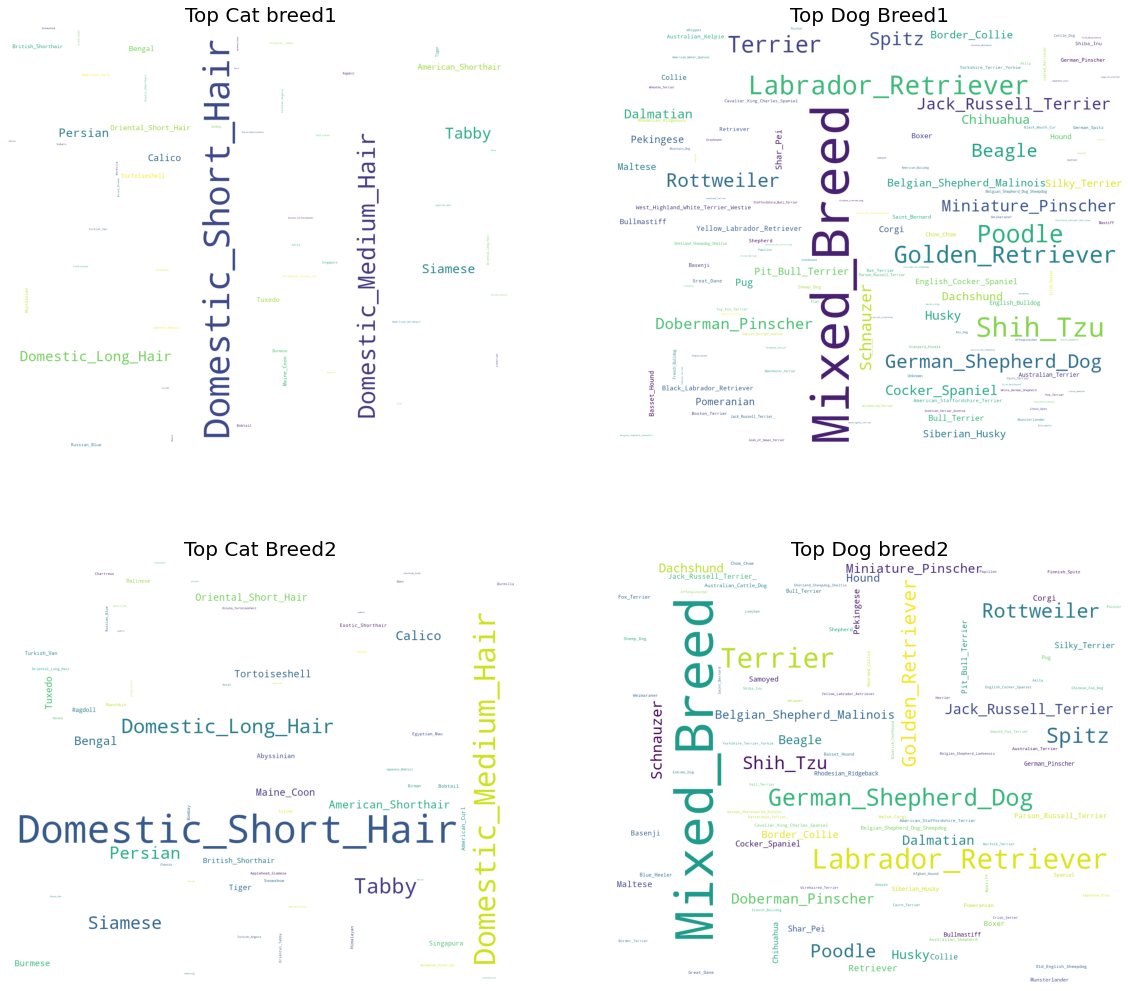

In [35]:
# appling wordcloud to the columns created above
fig, ax = plt.subplots(figsize = (20, 18))
plt.subplot(2, 2, 1)
text_cat1 = ' '.join(merged.loc[merged['Type'] == 'Cat', 'Breed1_name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text_cat1)
plt.imshow(wordcloud)
plt.title('Top Cat breed1', fontsize = 20)
plt.axis("off")

plt.subplot(2, 2, 2)
text_dog1 = ' '.join(merged.loc[merged['Type'] == 'Dog', 'Breed1_name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text_dog1)
plt.imshow(wordcloud)
plt.title('Top Dog Breed1', fontsize = 20)
plt.axis("off")

plt.subplot(2, 2, 3)
text_cat2 = ' '.join(merged.loc[merged['Type'] == 'Cat', 'Breed2_name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text_cat2)
plt.imshow(wordcloud)
plt.title('Top Cat Breed2', fontsize = 20)
plt.axis("off")

plt.subplot(2, 2, 4)
text_dog2 = ' '.join(merged.loc[merged['Type'] == 'Dog', 'Breed2_name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text_dog2)
plt.imshow(wordcloud)
plt.title('Top Dog breed2', fontsize = 20)
plt.axis("off")
plt.show()

It seems that not all values of these features are really breeds.
Sometimes people simply write that the dogs has a mixed breed, cats often are described as domestic with certain hair length.

In [36]:
# checking counts top 15 Breed names
(merged['Breed1_name'] + '__' + merged['Breed2_name']).value_counts().head(15)

Mixed_Breed__-                                5573
Domestic_Short_Hair__-                        4042
Domestic_Medium_Hair__-                       1264
Mixed_Breed__Mixed_Breed                      1188
Tabby__-                                       379
Domestic_Short_Hair__Domestic_Short_Hair       320
Domestic_Long_Hair__-                          244
Shih_Tzu__-                                    204
Poodle__-                                      153
Siamese__-                                     152
Labrador_Retriever__Mixed_Breed                132
Golden_Retriever__-                            123
Domestic_Medium_Hair__Domestic_Medium_Hair     110
Domestic_Medium_Hair__Domestic_Short_Hair      104
Calico__-                                      101
dtype: int64

## Description

Description could have lot of useful information.

(-0.5, 1199.5, 999.5, -0.5)

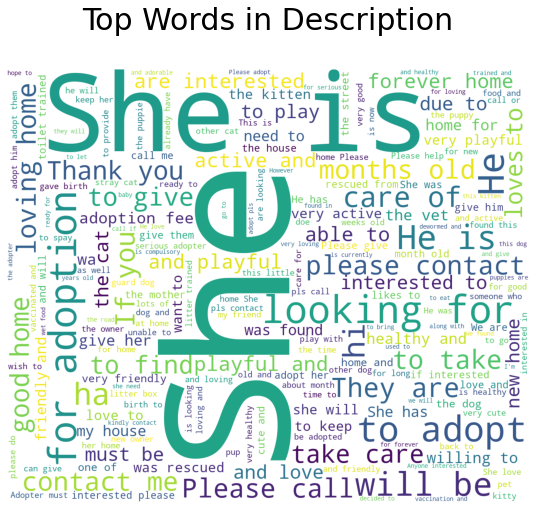

In [37]:
# plotting top words in description
fig, ax = plt.subplots(figsize = (12, 8))
text_cat = ' '.join(merged['Description'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top Words in Description\n', fontsize = 30)
plt.axis("off")

In [38]:
# creating new columns - description length and number of words in description
train['Description'] = train['Description'].fillna('')
test['Description'] = test['Description'].fillna('')
merged['Description'] = merged['Description'].fillna('')

train['desc_length'] = train['Description'].apply(lambda x: len(x))
train['desc_words'] = train['Description'].apply(lambda x: len(x.split()))

test['desc_length'] = test['Description'].apply(lambda x: len(x))
test['desc_words'] = test['Description'].apply(lambda x: len(x.split()))

merged['desc_length'] = merged['Description'].apply(lambda x: len(x))
merged['desc_words'] = merged['Description'].apply(lambda x: len(x.split()))

train['average_word_length'] = train['desc_length'] / train['desc_words']
test['average_word_length'] = test['desc_length'] / test['desc_words']
merged['average_word_length'] = merged['desc_length'] / merged['desc_words']

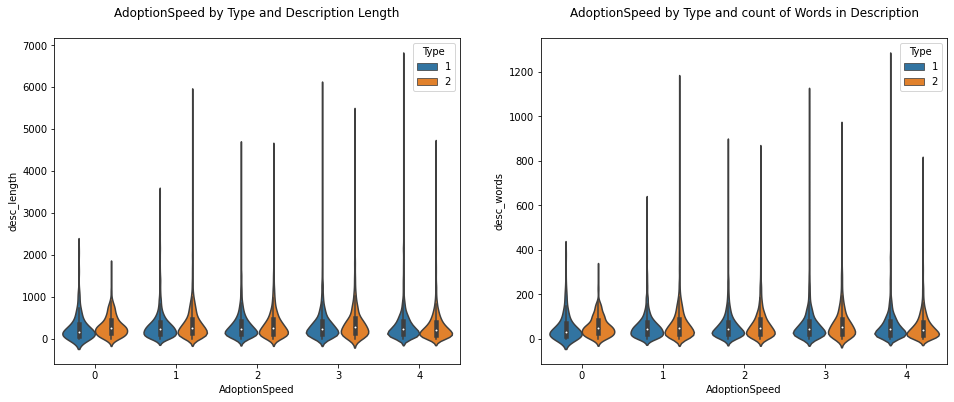

In [39]:
# plotting Addoption Speed by type, description len and words
plt.figure(figsize=(16, 6));
plt.subplot(1, 2, 1)
sns.violinplot(x="AdoptionSpeed", y="desc_length", hue="Type", data=train);
plt.title('AdoptionSpeed by Type and Description Length\n');

plt.subplot(1, 2, 2)
sns.violinplot(x="AdoptionSpeed", y="desc_words", hue="Type", data=train);
plt.title('AdoptionSpeed by Type and count of Words in Description\n');

Interestingly pets with short text in ads are adopted quickly.
Or maybe longer descriptions mean more problems in the pets, therefore adoption speed is lower?